# [WISDM Smartphone and Smartwatch Activity and Biometrics Dataset ](https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+)
by Team Vizard: Dhwani Parekh, Wenyi Shang, Akshat Sharma, Anirudh Sharma, Tre Tomaszewski

From
> Smartphone and Smartwatch-Based Biometrics Using Activities of Daily Living. IEEE Access, 7:133190-133202, Sept. 2019.

<style>table {margin:0;} </style>

| Data File Group | Total Size | Total Files | Instances |
|-:|-:|-:|-:|
|`Phone/Accel`| 250MB | 51  | 4,804,404 |
|`Phone/Gyro` | 205MB | 51  | 3,608,635 |
|`Watch/Accel`| 196MB | 51  | 3,777,048 |
|`Watch/Gyro` | 190MB | 51  | 3,440,344 |
|All          | 1.1GB | 204 | 15,630,426|

In [1]:
# I added interact and bqplot for interactions
%matplotlib widget
%matplotlib inline
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact
import traitlets
import seaborn as sns

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import bqplot

import glob

# Thanks to `ImportanceOfBeingErnest` from https://stackoverflow.com/questions/47404653/pandas-0-21-0-timestamp-compatibility-issue-with-matplotlib
pd.plotting.register_matplotlib_converters()

In [2]:
df_phone = pd.concat([pd.read_csv(f) for f in glob.glob('../data/processed/wisdm/merged_sensors/phone/*.csv')], ignore_index=True)
df_watch = pd.concat([pd.read_csv(f) for f in glob.glob('../data/processed/wisdm/merged_sensors/watch/*.csv')], ignore_index=True)

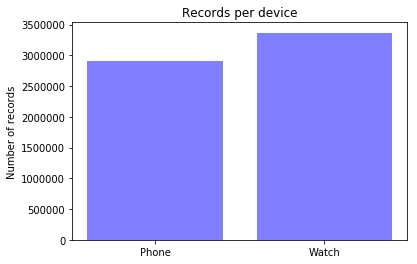

In [3]:
devices = ['Phone', 'Watch']
record_count = [len(df_phone.index), len(df_watch.index)]
plt.bar(devices, record_count, align='center', alpha=0.5, color = 'blue')
plt.ylabel('Number of records')
plt.title('Records per device')
plt.show();

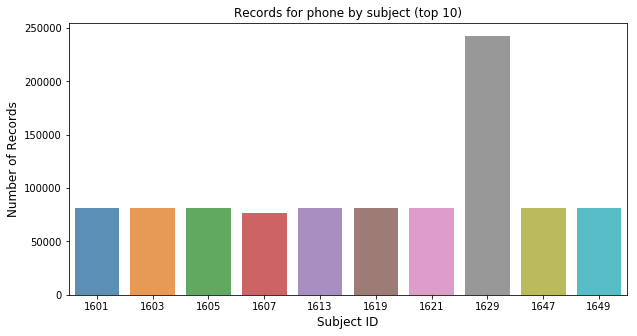

In [4]:
rps_phone_count  = df_phone['subject_id'].value_counts()
rps_phone_count = rps_phone_count[:10,]

plt.figure(figsize=(10,5))

sns.barplot(rps_phone_count.index, rps_phone_count.values, alpha=0.8)
plt.title('Records for phone by subject (top 10)')
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Subject ID', fontsize=12)
plt.show()

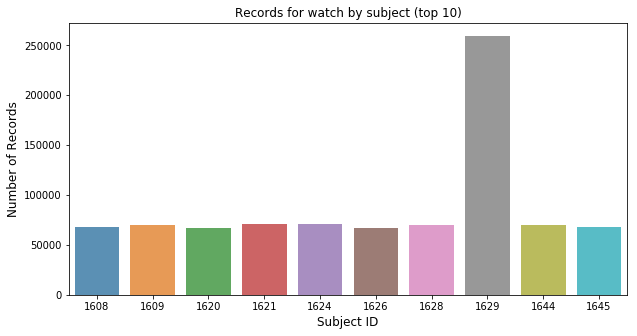

In [5]:
rps_watch_count  = df_watch['subject_id'].value_counts()
rps_watch_count = rps_watch_count[:10,]

plt.figure(figsize=(10,5))

sns.barplot(rps_watch_count.index, rps_watch_count.values, alpha=0.8)
plt.title('Records for watch by subject (top 10)')
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Subject ID', fontsize=12)
plt.show()

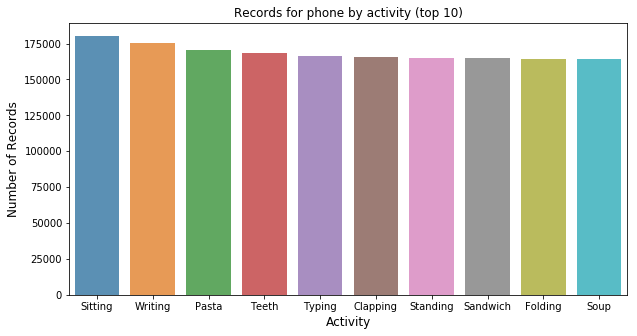

In [6]:
di = {"A": "Walking",
"B": "Jogging",
"C": "Stairs",
"D": "Sitting",
"E": "Standing",
"F": "Typing",
"G": "Teeth",
"H": "Soup",
"I": "Chips",
"J": "Pasta",
"K": "Drinking",
"L": "Sandwich",
"M": "Kicking",
"O": "Catch",
"P": "Dribbling",
"Q": "Writing",
"R": "Clapping",
"S": "Folding"}

df_phone = df_phone.replace({'activity_code': di})
rpa_phone_count  = df_phone['activity_code'].value_counts()
rpa_phone_count = rpa_phone_count[:10,]

plt.figure(figsize=(10,5))

sns.barplot(rpa_phone_count.index, rpa_phone_count.values, alpha=0.8)
plt.title('Records for phone by activity (top 10)')
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.show()

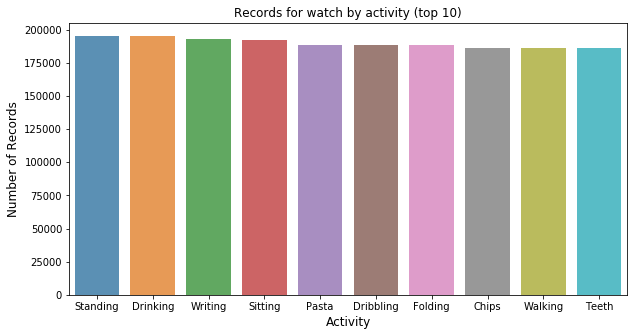

In [7]:
df_watch = df_watch.replace({'activity_code': di})
rpa_watch_count  = df_watch['activity_code'].value_counts()
rpa_watch_count = rpa_watch_count[:10,]

plt.figure(figsize=(10,5))

sns.barplot(rpa_watch_count.index, rpa_watch_count.values, alpha=0.8)
plt.title('Records for watch by activity (top 10)')
plt.ylabel('Number of Records', fontsize=12)
plt.xlabel('Activity', fontsize=12)
plt.show()

In [8]:
def get_by_subject_id(subject_id):
    subject_id = str(subject_id) # force into a string
    return {
        'phone': pd.read_csv('../data/processed/wisdm/merged_sensors/phone/{}_phone.csv'.format(subject_id)).drop(columns=['timestamp']),#, parse_dates=['timestamp']) The time isn't really needed and adds a lot of loading time
        'watch': pd.read_csv('../data/processed/wisdm/merged_sensors/watch/{}_watch.csv'.format(subject_id)).drop(columns=['timestamp'])#, parse_dates=['timestamp'])
    }

In [9]:
@interact(Subject_ID = ['1600','1601','1602','1603','1604','1605','1606','1607','1608','1609','1610','1611','1612','1613','1614','1615','1616','1617','1618','1619','1620','1621','1622','1623','1624','1625','1626','1627','1628','1629','1630','1631','1632','1633','1634','1635','1636','1637','1638','1639','1640','1641','1642','1643','1644','1645','1646','1647','1648','1649','1650'])
def get_subject(Subject_ID):
    ID=Subject_ID
    
    @interact(Device = ['phone', 'watch'])
    def get_device(Device):
        device=Device
    
        @interact(Coordinate = ['x_accel', 'y_accel','z_accel','x_gyro','y_gyro','z_gyro'])
        def get_coordinate(Coordinate):
            coordinate=Coordinate
    
            @interact(Aggregate = ['sum', 'mean','max','min','count'])
            def change_aggregation(Aggregate):
                if Aggregate=='sum':
                    y = get_by_subject_id(ID).get(device).groupby('activity_code')[coordinate].sum()
                if Aggregate=='mean':
                    y = get_by_subject_id(ID).get(device).groupby('activity_code')[coordinate].mean()
                if Aggregate=='max':
                    y = get_by_subject_id(ID).get(device).groupby('activity_code')[coordinate].max()
                if Aggregate=='min':
                    y = get_by_subject_id(ID).get(device).groupby('activity_code')[coordinate].min()
                if Aggregate=='count':
                    y = get_by_subject_id(ID).get(device).groupby('activity_code')[coordinate].count()
                bin_x_sc = bqplot.OrdinalScale()
                bin_x_ax = bqplot.Axis(scale = bin_x_sc,label='activity code')
                bin_y_sc = bqplot.LinearScale()
                bin_y_ax = bqplot.Axis(scale = bin_y_sc,orientation='vertical',label='value')
                bars = bqplot.Bars(x = y.index,y = y,scales = {'x': bin_x_sc, 'y': bin_y_sc})
                fig = bqplot.Figure(marks = [bars], axes = [bin_x_ax, bin_y_ax])
                display(fig)

interactive(children=(Dropdown(description='Subject_ID', options=('1600', '1601', '1602', '1603', '1604', '160…

# Interactive aggregated/derived data- PART 1
Above is an interactive bqplot project to display the aggregated/derived data of the dataset. It allows users to select subject ID (1600-1650), phone vs watch, coordinates (x_accel, y_accel, z_accel, x_gyro, y_gyro, z_gyro), and aggregation type (in total, there are 5 aggregation types: sum, mean, max, min, count). Users can select anything they want a from the four dropdowns, and the results will display with a barplot of the data of every activity correspondingly. By this interactive plot, users can learn about the aggregated results of the dataset.

In [10]:
@interact(Subject_ID = ['1600','1601','1602','1603','1604','1605','1606','1607','1608','1609','1610','1611','1612','1613','1614','1615','1616','1617','1618','1619','1620','1621','1622','1623','1624','1625','1626','1627','1628','1629','1630','1631','1632','1633','1634','1635','1636','1637','1638','1639','1640','1641','1642','1643','1644','1645','1646','1647','1648','1649','1650'])
def get_subject(Subject_ID):
    ID=Subject_ID
    
    @interact(Activity = ['walking','jogging','stairs','sitting','standing','typing','teeth','soup','chips','pasta','drinking','sandwich','kicking','catch','dribbling','writing','clapping','folding'])
    def get_activity(Activity):
        if(Activity=='walking'):
            activity='A'
        if(Activity=='jogging'):
            activity='B'
        if(Activity=='stairs'):
            activity='C'
        if(Activity=='sitting'):
            activity='D'   
        if(Activity=='standing'):
            activity='E'
        if(Activity=='typing'):
            activity='F'
        if(Activity=='teeth'):
            activity='G'
        if(Activity=='soup'):
            activity='H'
        if(Activity=='chips'):
            activity='I'
        if(Activity=='pasta'):
            activity='J'
        if(Activity=='drinking'):
            activity='K'
        if(Activity=='sandwich'):
            activity='L'
        if(Activity=='kicking'):
            activity='M'   
        if(Activity=='catch'):
            activity='O'
        if(Activity=='dribbling'):
            activity='P'
        if(Activity=='writing'):
            activity='Q'
        if(Activity=='clapping'):
            activity='R'
        if(Activity=='folding'):
            activity='S'  
        x = get_by_subject_id(ID).get('phone').groupby('activity_code').get_group(activity)[['x_accel','y_accel','z_accel','x_gyro','y_gyro','z_gyro']].cumsum(axis = 0)
        fig = plt.figure()
        ax = Axes3D(fig)
        t=ax.scatter(x['x_accel'],x['y_accel'],x['z_accel'],label='Curve of cumulative sum of activity %s of Subject %s'%(Activity,Subject_ID), c = plt.cm.jet(np.linspace(0,1,len(x))))
        ax.legend(loc='upper left')

interactive(children=(Dropdown(description='Subject_ID', options=('1600', '1601', '1602', '1603', '1604', '160…

# Interactive aggregated/derived data- PART 2
Above is an interactive 3D plot, showing curves of cumulative sum of any activity of any user. Because the cumulative summation is not a single value but a set of data points, we create a 3D scatter plot to display it, and colorize it with different colors, to show the development of the curve. Users can select the subject ID and activity they want, and a 3D curve will be displayed respectively, and the legend will show what it is.